## Load Dataset and Packages

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
import pandas as pd 
df=pd.read_csv('gdrive/My Drive/summer.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

#Data Exploration

##Word Frequency Plot

In [ ]:
def word_frequency(sentence):
  # joins all the sentenses
  sentence =" ".join(sentence)
  # creates tokens, creates lower class, removes numbers and lemmatizes the words
  new_tokens = word_tokenize(sentence)
  new_tokens = [t.lower() for t in new_tokens]
  new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
  new_tokens = [t for t in new_tokens if t.isalpha()]
  lemmatizer = WordNetLemmatizer()
  new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
  #counts the words, pairs and trigrams
  counted = Counter(new_tokens)
  counted_2= Counter(ngrams(new_tokens,2))
  counted_3= Counter(ngrams(new_tokens,3))
  #creates 3 data frames and returns thems
  word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
  word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
  trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
  return word_freq,word_pairs,trigrams,new_tokens

In [ ]:
data2, data3, data4, tokens = word_frequency(df['title_orig'].tolist())

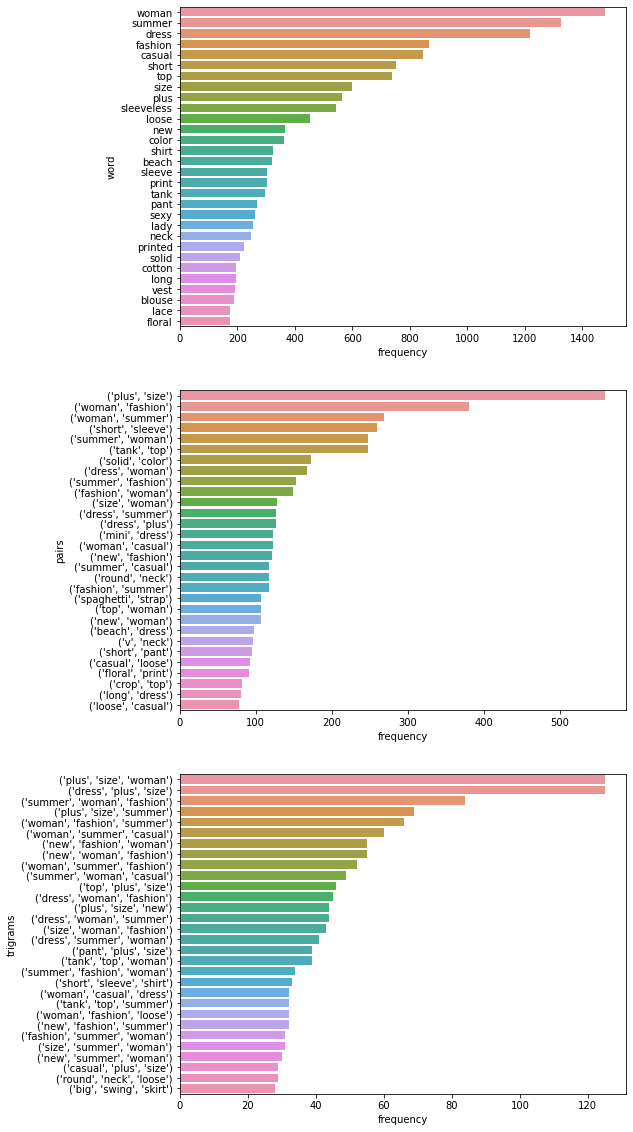

In [ ]:
# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(30))

In [ ]:
from collections import Counter
recounted = Counter(df["units_sold"])
recounted

Counter({1: 3,
         2: 2,
         3: 2,
         6: 1,
         7: 2,
         8: 4,
         10: 49,
         50: 76,
         100: 509,
         1000: 405,
         5000: 217,
         10000: 177,
         20000: 103,
         50000: 17,
         100000: 6})

##Metadata Features

In [ ]:
recounted = Counter(np.log(df["units_sold"]))
recounted

Counter({0.0: 3,
         0.6931471805599453: 2,
         1.0986122886681098: 2,
         1.791759469228055: 1,
         1.9459101490553132: 2,
         2.0794415416798357: 4,
         2.302585092994046: 49,
         3.912023005428146: 76,
         4.605170185988092: 509,
         6.907755278982137: 405,
         8.517193191416238: 217,
         9.210340371976184: 177,
         9.903487552536127: 103,
         10.819778284410283: 17,
         11.512925464970229: 6})

In [ ]:
recounted = Counter(df["currency_buyer"])
recounted

Counter({'EUR': 1573})

In [ ]:
recounted = Counter(df["badges_count"])
recounted

Counter({0: 1422, 1: 138, 2: 11, 3: 2})

In [ ]:
recounted = Counter(df["badge_local_product"])
recounted

Counter({0: 1544, 1: 29})

In [ ]:
recounted = Counter(df["badge_product_quality"])
recounted

Counter({0: 1456, 1: 117})

In [ ]:
recounted = Counter(df["badge_fast_shipping"])
recounted

Counter({0: 1553, 1: 20})

In [ ]:
recounted = Counter(df["urgency_text"])
recounted

Counter({'Quantité limitée !': 472,
         'Réduction sur les achats en gros': 1,
         nan: 1100})

In [ ]:
recounted = Counter(df["product_variation_size_id"])
recounted

Counter({'04-3XL': 1,
         '1': 2,
         '1 PC - XL': 1,
         '1 pc.': 2,
         '10 ml': 3,
         '100 cm': 1,
         '100 x 100cm(39.3 x 39.3inch)': 1,
         '100pcs': 1,
         '10pcs': 1,
         '17': 1,
         '1m by 3m': 1,
         '1pc': 1,
         '2': 1,
         '20PCS-10PAIRS': 1,
         '20pcs': 1,
         '25': 2,
         '25-S': 1,
         '26(Waist 72cm 28inch)': 1,
         '29': 2,
         '2XL': 4,
         '2pcs': 3,
         '3 layered anklet': 1,
         '30 cm': 1,
         '32/L': 1,
         '33': 3,
         '34': 3,
         '35': 2,
         '36': 1,
         '3XL': 2,
         '4': 1,
         '4-5 Years': 1,
         '40 cm': 1,
         '4XL': 5,
         '5': 1,
         '5PAIRS': 1,
         '5XL': 2,
         '60': 1,
         '6XL': 1,
         '80 X 200 CM': 1,
         'AU plug Low quality': 1,
         'B': 1,
         'Baby Float Boat': 1,
         'Base & Top & Matte Top Coat': 1,
         'Base Coat': 1,
      

##Product Color

In [ ]:
def main_color(s):
  main_color = {"red":"red", "white":"white", "pink":"pink", "yellow":"yellow", "green":"green", "blue":"blue", "wine":"red", "burgundy":"red", "black":"black", "navy":"navy", "orange":"orange", 
  "rose":"pink", "gray":"gray", "grey":"gray", "purple":"purple", "violet":"purple", "army":"green", "leopard":"orange", "ivory":"white", 
  "brown":"brown", "coffee":"brown", "camel":"beige", "tan":"brown", "nude":"beige", "khaki":"khaki", "apricot":"yellow", "camouflage":"green", "jasper":"red"}  # ordered by importance
  for key, value in main_color.items():
    if key in s:
      return value
  return "others"

In [ ]:
product_color = df["product_color"]
product_color = [s.lower() if type(s) is str else 'nan' for s in product_color]
product_color = [main_color(s) for s in product_color]

In [ ]:
recounted = Counter(product_color)
recounted

Counter({'beige': 3,
         'black': 309,
         'blue': 162,
         'brown': 15,
         'gray': 85,
         'green': 145,
         'khaki': 13,
         'navy': 4,
         'orange': 33,
         'others': 86,
         'pink': 120,
         'purple': 55,
         'red': 149,
         'white': 282,
         'yellow': 112})

In [ ]:
from matplotlib import colors
# product_color = [(-0.1,-0.1,-0.1,-0.1) if s == "others" else colors.to_rgba(s) for s in product_color]
rgb = []
for s in product_color:
  if s != "others":
    rgb.append(np.array(colors.to_rgb(s)))
rgb = np.array(rgb)   
avg_rgb = np.average(rgb, axis=0)
product_colors = [avg_rgb if s == "others" else np.array(colors.to_rgb(s)) for s in product_color]

##Inspect Y: unit_sold

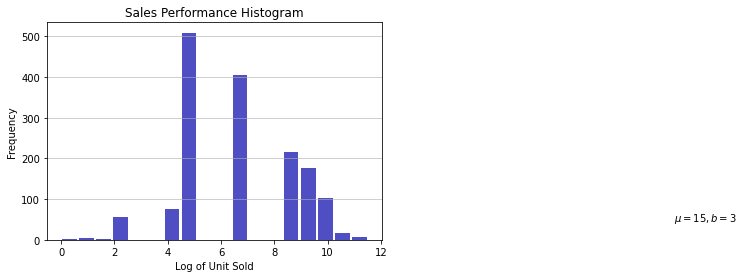

In [ ]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=np.log(df["units_sold"]), bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Log of Unit Sold')
plt.ylabel('Frequency')
plt.title('Sales Performance Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()

#Feature Engineering


In [ ]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


## Metadata

Product Color

In [ ]:
df['product_color_rgb'] = product_colors

Log Prices

In [ ]:
df['log_price'] = [np.log(p) for p in df["price"]]
df['log_retail_price'] = [np.log(p) for p in df["retail_price"]]
df["discount_ratio"] = [df["price"][i]/df["retail_price"][i] for i in range(len(df["price"]))]

Log Merchant Rating Count

In [ ]:
df['log_merchant_rating_count'] = np.log(df['merchant_rating_count'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Urgent Text

In [ ]:
df['urgent'] = [1 if s == "Quantité limitée !" else 0 for s in df["urgency_text"]]

##Title Word2Vec

In [ ]:
def process_sentence(sentence):
  new_tokens = word_tokenize(sentence)
  new_tokens = [t.lower() for t in new_tokens]
  new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
  new_tokens = [t for t in new_tokens if t.isalpha()]
  lemmatizer = WordNetLemmatizer()
  new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
  return new_tokens

In [ ]:
titles = df['title_orig'].tolist()
data = [process_sentence(t) for t in titles]

Implemented based on official documentation: https://radimrehurek.com/gensim/models/word2vec.html.

In [ ]:
model = gensim.models.Word2Vec(sentences=data, size=100, window=5, min_count=1, workers=4)
model.train(data,total_examples=len(data),epochs=10)

(117222, 232260)

In [ ]:
print(model.wv['woman'])  # Find the vector of the word.
print(model.wv.most_similar('woman', topn=10))  # 10 Most similar words for inspection.

[ 0.75983566  0.12644938  0.78847146 -0.28178236  0.2861162  -0.18816599
 -0.48633993 -0.6745295   0.16860703 -0.07057905  0.2477229  -0.34058478
  0.23455139  0.42934138 -0.15941022  0.00969816  0.16407388 -0.58575386
 -0.49762347 -0.14613423 -0.51411295  0.17971982  0.06775796 -0.34460825
  0.0022286  -0.3049971  -0.19476938 -0.16365495 -0.339247   -0.17635068
  0.48819745 -0.12947679 -0.16332006  0.18870258 -0.6144231   0.49991292
  0.16470602 -0.18340325 -0.12793332  0.12470133 -0.20216903  0.19737816
 -0.04860795  0.40413254 -0.3711021  -0.11070357 -0.28432235  0.02377093
 -0.3493036  -0.15354282  0.12203708  0.5322858  -0.48693675 -0.00889123
 -0.26022062 -0.0216398   0.02691816 -0.22232372 -0.06186914  0.10933387
 -0.5019992  -0.0866769  -0.37062824  0.07139453  0.21619418 -0.09960822
  0.2520942  -0.37264138 -0.39679667  0.14422719  0.4641868  -0.49185836
 -0.47566012  0.04145095  0.22259739  0.07102675 -0.18803416 -0.05766217
 -0.76252896  0.25268748 -0.21937484 -0.04473998 -0

In [ ]:
def caculate_average_word2vec(model, word_list):
  sum = np.matrix([model.wv[w] for w in word_list]).sum(axis=0)
  return sum / len(word_list)

In [ ]:
word2vec_avg = [caculate_average_word2vec(model, d) for d in data]
df['word2vec_avg'] = word2vec_avg

## Label y (Low / High Sales)

In [ ]:
label = [1 if sales > 400 else 0 for sales in df["units_sold"]]
df['high_sale'] = label

## Keep Features For Training

In [ ]:
data = df[["log_price", "log_retail_price", "uses_ad_boosts", "rating", "badges_count", "badge_local_product", "badge_product_quality", "badge_fast_shipping", "shipping_option_price", "shipping_is_express", "countries_shipped_to", "inventory_total", "product_color_rgb", "urgent", "log_merchant_rating_count", "word2vec_avg", "high_sale"]]

In [ ]:
data = df[["log_price", "log_retail_price", "discount_ratio", "uses_ad_boosts", "badges_count", "badge_local_product", "badge_product_quality", "badge_fast_shipping", "shipping_option_price", "shipping_is_express", "countries_shipped_to", "inventory_total", "product_color_rgb", "urgent", "word2vec_avg", "high_sale"]]

In [ ]:
data.head()

,log_price,log_retail_price,discount_ratio,uses_ad_boosts,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,product_color_rgb,urgent,word2vec_avg,high_sale
0,2.772589,2.639057,1.142857,0,0,0,0,0,4,0,34,50,"[1.0, 1.0, 1.0]",1,[[[[[ 0.61215425 0.01808692 0.4927808 -0.09...,0
1,2.079442,3.091042,0.363636,1,0,0,0,0,2,0,41,50,"[0.0, 0.5019607843137255, 0.0]",1,[[[[[ 0.7942599 0.09386994 0.90733564 -0.32...,1
2,2.079442,3.761200,0.186047,0,0,0,0,0,3,0,36,50,"[1.0, 0.6470588235294118, 0.0]",1,[[[[[ 5.95010996e-01 -3.74357332e-04 5.653014...,0
3,2.079442,2.079442,1.000000,1,0,0,0,0,2,0,41,50,"[0.0, 0.0, 0.0]",0,[[[[[ 0.73580956 0.08567876 0.60803026 -0.26...,1
4,1.000632,1.098612,0.906667,1,0,0,0,0,1,0,35,50,"[1.0, 1.0, 0.0]",1,[[[[[ 7.39013493e-01 -9.80471447e-03 6.262778...,0


#NN Model

## Baseline 1: Random Forest

In [ ]:
data_rf = data
rgb = data_rf["product_color_rgb"]
rgb = np.stack(rgb.values, axis=0)
for i in range(3):
  data_rf["product_color_rgb"+str(i)] = rgb[:,i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
word2vec = data_rf["word2vec_avg"]
word2vec = np.stack(word2vec.values, axis=0)
for i in range(100):
  data_rf["word2vec_avg"+str(i)] = word2vec[:,i]

In [ ]:
data_rf.replace([np.inf, -np.inf], np.nan, inplace=True)
data_rf = data_rf.dropna()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
X = data_rf[data_rf.columns.difference(['high_sale', 'product_color_rgb', 'word2vec_avg'])]
y = data_rf['high_sale']

In [ ]:
from sklearn.model_selection import train_test_split
# Split into 0.75:0.125:0.125
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.14286, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

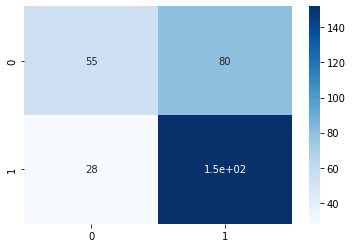

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cf_mat = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cf_mat, annot=True, cmap='Blues')
# sns.heatmap(cf_mat/np.sum(cf_mat), annot=True, 
#             fmt='.2%', cmap='Blues')

In [ ]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_list = list(X_train.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: countries_shipped_to Importance: 0.19
Variable: log_price            Importance: 0.17
Variable: discount_ratio       Importance: 0.16
Variable: log_retail_price     Importance: 0.12
Variable: product_color_rgb1   Importance: 0.07
Variable: product_color_rgb2   Importance: 0.06
Variable: shipping_option_price Importance: 0.06
Variable: product_color_rgb0   Importance: 0.05
Variable: badges_count         Importance: 0.03
Variable: urgent               Importance: 0.03
Variable: uses_ad_boosts       Importance: 0.03
Variable: badge_product_quality Importance: 0.02
Variable: badge_fast_shipping  Importance: 0.01
Variable: badge_local_product  Importance: 0.01
Variable: inventory_total      Importance: 0.0
Variable: shipping_is_express  Importance: 0.0


## Baseline 2: Shallow NN Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# define the keras model
model = Sequential()
model.add(layers.Dense(12, input_dim=8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150


ValueError: ignored